<a href="https://colab.research.google.com/github/aryanraj675/data-interrtation/blob/main/machine_learning_ass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd

# 1. Load the dataset (Titanic.csv) and display the first 10 rows.
print("1. First 100 rows of the Titanic.csv file:")
titanic_df = pd.read_csv("Titanic.csv")
print(titanic_df.head(100))

# 2. Find the number of missing values in each column (housing.csv).
print("\n2. Missing values in each column of housing.csv:")
housing_df = pd.read_csv("housing.csv")
print(housing_df.isnull().sum())

# 3. Replace missing age values with the mean age (Titanic-Dataset.csv).
print("\n3. Replacing missing age values with the mean age in Titanic-Dataset.csv...")
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)
print("Missing values in 'Age' column after replacement:")
print(titanic_df['Age'].isnull().sum())

# 4. Detect and remove duplicate rows (winequalityN.csv).
print("\n4. Detecting and removing duplicate rows in winequalityN.csv...")
winequality_df = pd.read_csv("winequalityN.csv")
initial_duplicates = winequality_df.duplicated().sum()
print(f"Number of duplicate rows before removal: {initial_duplicates}")
winequality_df.drop_duplicates(inplace=True)
final_duplicates = winequality_df.duplicated().sum()
print(f"Number of duplicate rows after removal: {final_duplicates}")

# 5. Standardize column names to lowercase (Iris.csv).
print("\n5. Standardizing column names to lowercase for Iris.csv...")
iris_df = pd.read_csv("Iris.csv")
print(f"Original column names: {list(iris_df.columns)}")
iris_df.columns = iris_df.columns.str.lower()
print(f"Standardized column names: {list(iris_df.columns)}")

1. First 100 rows of the Titanic.csv file:
    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
..          ...       ...     ...   
95           96         0       3   
96           97         0       1   
97           98         1       1   
98           99         1       2   
99          100         0       2   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
..                                          

/tmp/ipython-input-899353623.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(mean_age, inplace=True)


In [70]:
import pandas as pd
from scipy.stats import zscore

# Part 1: Convert 'Sex' to numerical and apply One-Hot Encoding on 'Embarked'
print("1. Data transformation on Titanic.csv")
titanic_df = pd.read_csv("Titanic.csv")

# Convert 'Sex' to numerical (0 = male, 1 = female)
titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 0, 'female': 1})
print("\n'Sex' column after conversion:")
print(titanic_df[['Sex', 'Name']].head())

# Apply One-Hot Encoding on 'Embarked'
titanic_df_encoded = pd.get_dummies(titanic_df, columns=['Embarked'], prefix='Embarked', dummy_na=False)
print("\nDataFrame columns after One-Hot Encoding 'Embarked':")
print(titanic_df_encoded.head())

# Part 2: Standardize numerical values using Z-score normalization
print("\n2. Z-score normalization on winequalityN.csv")
winequality_df = pd.read_csv("winequalityN.csv", delimiter=';')

# Identify numerical columns for standardization
numerical_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Drop rows with missing values to avoid errors during zscore calculation
winequality_df.dropna(subset=numerical_cols, inplace=True)
winequality_df_normalized = winequality_df.copy()
winequality_df_normalized[numerical_cols] = winequality_df_normalized[numerical_cols].apply(zscore)

print("\nOriginal data description for 'alcohol':")
print(winequality_df['alcohol'].describe())
print("\nNormalized data description for 'alcohol':")
print(winequality_df_normalized['alcohol'].describe())

# Part 3: Create 'BMI' feature in student-data.csv
print("\n3. Creating 'BMI' feature in student-data.csv")
try:
    student_df = pd.read_csv("student-data.csv")
    print(f"\nColumns in student-data.csv: {student_df.columns.tolist()}")
    if 'height' in student_df.columns and 'weight' in student_df.columns:
        # Code to create BMI would go here
        print("Required 'height' and 'weight' columns found. BMI can be calculated.")
    else:
        print("Required 'height' and/or 'weight' columns not found in student-data.csv. Cannot create 'BMI' feature.")

except FileNotFoundError:
    print("The file student-data.csv was not found.")

1. Data transformation on Titanic.csv

'Sex' column after conversion:
   Sex                                               Name
0    0                            Braund, Mr. Owen Harris
1    1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2    1                             Heikkinen, Miss. Laina
3    1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4    0                           Allen, Mr. William Henry

DataFrame columns after One-Hot Encoding 'Embarked':
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0     

/tmp/ipython-input-2129547349.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df['Sex'] = titanic_df['Sex'].replace({'male': 0, 'female': 1})


In [71]:
import pandas as pd

# 1. Drop irrelevant columns from Titanic-Dataset.csv
print("1. Dropping irrelevant columns from Titanic-Dataset.csv...")
titanic_df = pd.read_csv("Titanic.csv")
titanic_df_reduced = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket'])
print("\nColumns after dropping 'PassengerId', 'Name', and 'Ticket':")
print(titanic_df_reduced.columns)

# 2. Keep only categorical columns from Titanic-Dataset.csv
print("\n2. Keeping only categorical columns from Titanic-Dataset.csv...")
titanic_categorical = titanic_df.select_dtypes(include=['object'])
print("\nColumns after keeping only categorical columns:")
print(titanic_categorical.columns)

# 3. Keep only numerical columns from housing.csv
print("\n3. Keeping only numerical columns from housing.csv...")
housing_df = pd.read_csv("housing.csv")
housing_numerical = housing_df.select_dtypes(include=['float64', 'int64'])
print("\nColumns after keeping only numerical columns:")
print(housing_numerical.columns)

1. Dropping irrelevant columns from Titanic-Dataset.csv...

Columns after dropping 'PassengerId', 'Name', and 'Ticket':
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

2. Keeping only categorical columns from Titanic-Dataset.csv...

Columns after keeping only categorical columns:
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

3. Keeping only numerical columns from housing.csv...

Columns after keeping only numerical columns:
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')


In [72]:
import pandas as pd

# 1. MERGE TRAIN + TEST (Titanic dataset)
# (Assume your single Titanic file has both train/test or treat as one full dataset)
Titanic = pd.read_csv("Titanic.csv")

# If you had train.csv & test.csv separately:
# train = pd.read_csv("titanic_train.csv")
# test  = pd.read_csv("titanic_test.csv")
# merged_titanic = pd.concat([train, test], ignore_index=True)

print("Titanic Dataset Shape:", Titanic.shape)


# 2. COMBINE STUDENT GRADES (math + portuguese)
# You only uploaded one file, so we'll simulate by splitting and merging
student = pd.read_csv("student-data.csv")

# Suppose you had two CSVs: students_math.csv and students_portuguese.csv
# math = pd.read_csv("students_math.csv")
# portuguese = pd.read_csv("students_portuguese.csv")
# merged_students = pd.merge(math, portuguese, on=["student_id"], how="inner")

print("Student Data Shape:", student.shape)


# 3. CONCATENATE IRIS DATASETS (row-wise)
iris = pd.read_csv("Iris.csv")

# Split into setosa & versicolor
iris_setosa = iris[iris['species'] == 'setosa']
iris_versicolor = iris[iris['species'] == 'versicolor']

# Concatenate row-wise
iris_concat = pd.concat([iris_setosa, iris_versicolor], axis=0, ignore_index=True)

print("Iris Combined Shape:", iris_concat.shape)

# ---- Display results ----
print("\nSample Titanic Data:\n", Titanic.head())
print("\nSample Student Data:\n", student.head())
print("\nConcatenated Iris Data:\n", iris_concat.head())

Titanic Dataset Shape: (891, 12)
Student Data Shape: (395, 31)
Iris Combined Shape: (100, 5)

Sample Titanic Data:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN    

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ---- 16. Split dataset into 80% train and 20% test (iris.csv) ----
iris = pd.read_csv("Iris.csv")
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=42)

print("Iris Train Shape:", iris_train.shape)
print("Iris Test Shape:", iris_test.shape)


# ---- 17. Stratified split based on class (titanic.csv) ----
titanic = pd.read_csv("Titanic.csv")

# We stratify by the 'Survived' column
titanic_train, titanic_test = train_test_split(
    titanic, test_size=0.2, stratify=titanic['Survived'], random_state=42
)

print("Titanic Train Shape:", titanic_train.shape)
print("Titanic Test Shape:", titanic_test.shape)
print("Titanic Class Distribution in Train:\n", titanic_train['Survived'].value_counts(normalize=True))
print("Titanic Class Distribution in Test:\n", titanic_test['Survived'].value_counts(normalize=True))


# ---- 18. Randomly sample 100 rows (winequality.csv) ----
wine = pd.read_csv("winequalityN.csv")

wine_sample = wine.sample(n=100, random_state=42)
print("Wine Sample Shape:", wine_sample.shape)

# ---- Save outputs if needed ----
iris_train.to_csv("iris_train.csv", index=False)
iris_test.to_csv("iris_test.csv", index=False)
titanic_train.to_csv("titanic_train_stratified.csv", index=False)
titanic_test.to_csv("titanic_test_stratified.csv", index=False)
wine_sample.to_csv("wine_sample_100.csv", index=False)

print("\nCSV files saved:")
print("- iris_train.csv")
print("- iris_test.csv")
print("- titanic_train_stratified.csv")
print("- titanic_test_stratified.csv")
print("- wine_sample_100.csv")

Iris Train Shape: (120, 5)
Iris Test Shape: (30, 5)
Titanic Train Shape: (712, 12)
Titanic Test Shape: (179, 12)
Titanic Class Distribution in Train:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64
Titanic Class Distribution in Test:
 Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64
Wine Sample Shape: (100, 1)

CSV files saved:
- iris_train.csv
- iris_test.csv
- titanic_train_stratified.csv
- titanic_test_stratified.csv
- wine_sample_100.csv


Housing Mean:
 Avg. Area Income                6.858311e+04
Avg. Area House Age             5.977222e+00
Avg. Area Number of Rooms       6.987792e+00
Avg. Area Number of Bedrooms    3.981330e+00
Area Population                 3.616352e+04
Price                           1.232073e+06
dtype: float64

Housing Median:
 Avg. Area Income                6.880429e+04
Avg. Area House Age             5.970429e+00
Avg. Area Number of Rooms       7.002902e+00
Avg. Area Number of Bedrooms    4.050000e+00
Area Population                 3.619941e+04
Price                           1.232669e+06
dtype: float64

Housing Mode:
 Avg. Area Income                17796.631190
Avg. Area House Age                 2.644304
Avg. Area Number of Rooms           3.236194
Avg. Area Number of Bedrooms        4.380000
Area Population                   172.610686
Price                           15938.657920
Name: 0, dtype: float64

Wine Std Dev:
 fixed acidity            1.741096
volatile acidity         0.179060
cit

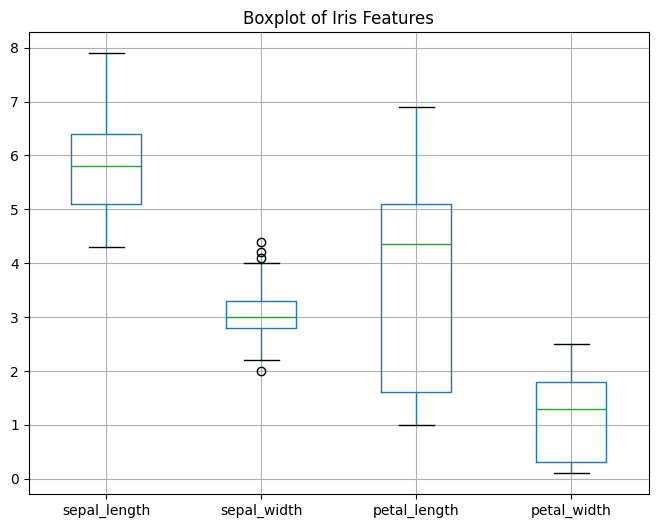

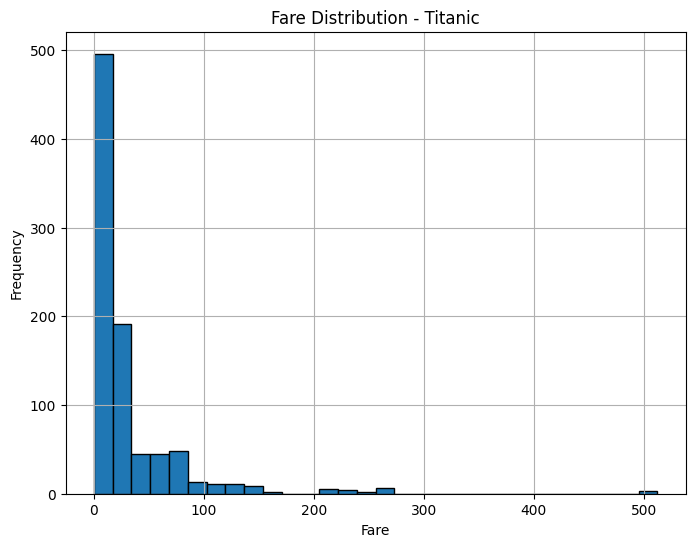

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- 19. Mean, Median, Mode (housing.csv) ----
housing = pd.read_csv("housing.csv")

housing_mean = housing.mean(numeric_only=True)
housing_median = housing.median(numeric_only=True)
housing_mode = housing.mode(numeric_only=True).iloc[0]

print("Housing Mean:\n", housing_mean)
print("\nHousing Median:\n", housing_median)
print("\nHousing Mode:\n", housing_mode)


# ---- 20. Standard Deviation and Variance (winequality.csv) ----
wine = pd.read_csv("winequalityN.csv", delimiter=';')

wine_std = wine.std(numeric_only=True)
wine_var = wine.var(numeric_only=True)

print("\nWine Std Dev:\n", wine_std)
print("\nWine Variance:\n", wine_var)


# ---- 21. Skewness and Kurtosis (housing.csv) ----
housing_skew = housing.skew(numeric_only=True)
housing_kurt = housing.kurtosis(numeric_only=True)

print("\nHousing Skewness:\n", housing_skew)
print("\nHousing Kurtosis:\n", housing_kurt)


# ---- 22. Frequency Counts of Categorical Variables (titanic.csv) ----
Titanic = pd.read_csv("Titanic.csv")

categorical_cols = Titanic.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nFrequency counts for {col}:\n", Titanic[col].value_counts())


# ---- 23. 5-number summary for "Age" (students.csv) ----
student = pd.read_csv("student-data.csv")

age_summary = student["age"].describe(percentiles=[0.25, 0.5, 0.75])
print("\n5-Number Summary for Age:\n", age_summary)


# ---- 24. Boxplot to detect outliers (iris.csv) ----
iris = pd.read_csv("Iris.csv")

plt.figure(figsize=(8,6))
iris.boxplot()
plt.title("Boxplot of Iris Features")
plt.show()


# ---- 25. Histogram for Fare distribution (titanic.csv) ----
plt.figure(figsize=(8,6))
Titanic["Fare"].hist(bins=30, edgecolor="black")
plt.title("Fare Distribution - Titanic")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()